# **1. 외계행성 생존 가능성 머신러닝 학습**

# 오버샘플링

In [110]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [111]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [112]:
full_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/project/phl_exoplanet_catalog_2019.csv')

In [113]:
import os

os.chdir('/content/drive/MyDrive/Colab Notebooks/project')

In [114]:
full_data

,P_NAME,P_STATUS,P_MASS,P_MASS_ERROR_MIN,P_MASS_ERROR_MAX,P_RADIUS,P_RADIUS_ERROR_MIN,P_RADIUS_ERROR_MAX,P_YEAR,P_UPDATED,...,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
0,11 Com b,3.0,6165.86330,-476.74200,476.74200,NaN,NaN,NaN,2007,2014-05-14,...,0,Hot,0,0.083813,Coma Berenices,Com,Berenice's Hair,12.082709,6165.863300,1.29000
1,11 UMi b,3.0,4684.78480,-794.57001,794.57001,NaN,NaN,NaN,2009,2018-09-06,...,0,Hot,0,0.082414,Ursa Minor,UMi,Little Bear,12.229641,4684.784800,1.53000
2,14 And b,3.0,1525.57440,NaN,NaN,NaN,NaN,NaN,2008,2014-05-14,...,0,Hot,0,0.081917,Andromeda,And,Andromeda,12.848516,1525.574400,0.83000
3,14 Her b,3.0,1481.07850,-47.67420,47.67420,NaN,NaN,NaN,2002,2018-09-06,...,0,Cold,0,0.145241,Hercules,Her,Hercules,12.865261,1481.078500,2.93000
4,16 Cyg B b,3.0,565.73385,-25.42624,25.42624,NaN,NaN,NaN,1996,2018-09-06,...,1,Warm,0,0.368627,Cygnus,Cyg,Swan,13.421749,565.733850,1.66000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4043,K2-296 b,3.0,NaN,NaN,NaN,1.87,0.45,0.2,2019,5/23/19,...,0,Warm,2,0.755038,Virgo,Vir,Virgin,1.870000,4.155456,0.13456
4044,K2-296 c,3.0,NaN,NaN,NaN,2.76,NaN,NaN,2019,5/23/19,...,0,Hot,0,0.363831,Virgo,Vir,Virgin,2.760000,8.047485,0.05769
4045,GJ 1061 b,3.0,1.38000,0.15000,0.16000,NaN,NaN,NaN,2019,9/3/19,...,0,Hot,0,0.588562,Horologium,Hor,Pendulum Clock,1.102775,1.380000,0.02100
4046,GJ 1061 c,3.0,1.75000,0.23000,0.23000,NaN,NaN,NaN,2019,9/3/19,...,0,Warm,1,0.879042,Horologium,Hor,Pendulum Clock,1.178333,1.750000,0.03500


In [115]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4048 entries, 0 to 4047
Columns: 112 entries, P_NAME to P_SEMI_MAJOR_AXIS_EST
dtypes: float64(94), int64(4), object(14)
memory usage: 3.5+ MB


In [116]:
full_data.columns

Index(['P_NAME', 'P_STATUS', 'P_MASS', 'P_MASS_ERROR_MIN', 'P_MASS_ERROR_MAX',
       'P_RADIUS', 'P_RADIUS_ERROR_MIN', 'P_RADIUS_ERROR_MAX', 'P_YEAR',
       'P_UPDATED',
       ...
       'P_HABZONE_CON', 'P_TYPE_TEMP', 'P_HABITABLE', 'P_ESI',
       'S_CONSTELLATION', 'S_CONSTELLATION_ABR', 'S_CONSTELLATION_ENG',
       'P_RADIUS_EST', 'P_MASS_EST', 'P_SEMI_MAJOR_AXIS_EST'],
      dtype='object', length=112)

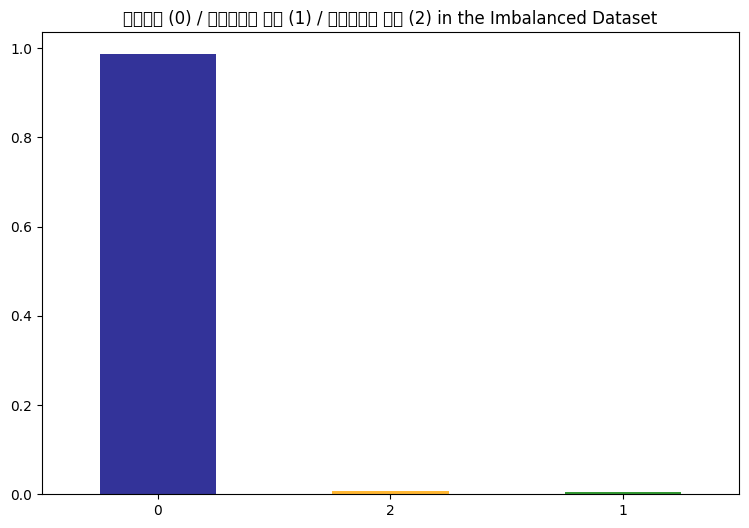

In [117]:
# P_HABITABLE = 행성은 잠재적으로 거주 가능 지수입니다(1 = 보수적, 2 = 낙관적).
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (9,6))
full_data.P_HABITABLE.value_counts(normalize = True, ascending = False).plot(kind='bar', color= ['navy','orange','green'], alpha = 0.8, rot=0)
# value_counts(normalize = True, ascending = False): 각 등급별 비율, 내림차순
plt.title('거주불가 (0) / 보수적으로 가능 (1) / 낙관적으로 가능 (2) in the Imbalanced Dataset')
plt.show()

In [118]:
full_data['P_HABITABLE'].value_counts(normalize=True)

0    0.986413
2    0.008399
1    0.005188
Name: P_HABITABLE, dtype: float64

In [119]:
#간단한 오버샘플링 전략으로 클래스 불균형 해결
#확실히 데이터 세트의 98.64%가 거주 가능한 행성으로 인해 불균형이 발생했습니다.
#각각 0.84%와 0.52%만이 보수적으로 거주 가능한 행성이고 낙관적으로 거주 가능한 행성입니다.
#ML 모델의 적절한 성능을 얻으려면 먼저 각 클래스가 동일한 표현 비율을 갖는 데이터 세트의 균형을 맞춰야 합니다.
#이를 위해 간단한 오버샘플링 기술(리샘플링 전략)을 사용하고 있습니다.

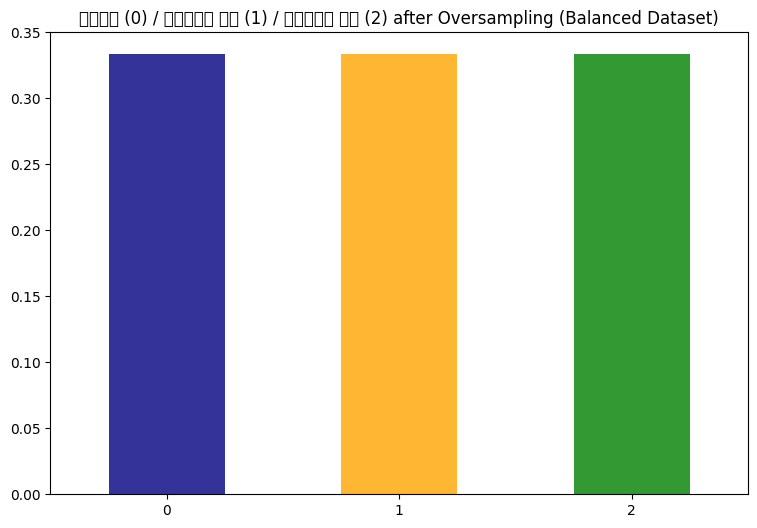

In [120]:
from sklearn.utils import resample
no = full_data[full_data.P_HABITABLE == 0]
yes_cons = full_data[full_data.P_HABITABLE == 1]
yes_opti = full_data[full_data.P_HABITABLE == 2]
# 사이킷런에서 resampling을 통해 소수의 클래스를 추출해서 클래스 비율을 맞춤
# 사이킷런의 resample은 데이터셋에서 중복을 허용해서 샘플을 추출함
#
# X, y = resample(샘플링할 X, 샘플링할 y, replace=True, n_samples=100) 100번될때까지 무작위로 샘플링해 반환
yes_cons_oversampled = resample(yes_cons, replace=True, n_samples=len(no), random_state=12345)
# df_12_axis0 = pd.concat ([df_1, df_2]) # 행 바인딩: 축 = 0, 기본값
# 행을 따라 DataFrame1, 2를 연결합니다. 축=0, 기본값
oversampled = pd.concat([no, yes_cons_oversampled])
yes_opti_oversampled = resample(yes_opti, replace=True, n_samples=len(no), random_state=12345)
oversampled = pd.concat([oversampled, yes_opti_oversampled])

fig = plt.figure(figsize = (9,6))
oversampled.P_HABITABLE.value_counts(normalize = True, ascending = False).plot(kind='bar', color= ['navy','orange','green'], alpha = 0.8, rot=0)
plt.title('거주불가 (0) / 보수적으로 가능 (1) / 낙관적으로 가능 (2) after Oversampling (Balanced Dataset)')
plt.show()

In [121]:
oversampled['P_HABITABLE'].value_counts(normalize=True)

0    0.333333
1    0.333333
2    0.333333
Name: P_HABITABLE, dtype: float64

# 데이터 전처리

In [122]:
# heatmap: 열을 의미하는 heat와 지도를 뜻하는 map을 합친 단어로
#          데이터들의 배열을 색상으로 표현해주는 그래프이다.
# heatmap을 사용하는 이유
# 1. 두개의 카테고리 값에 대한 값 변화를 한눈에 알기 쉽다.
# 2. 대용량 데이터도 heatmap을 이용해 시각화 한다면 이미지 몇장으로 표현이 가능하다.

<Axes: >

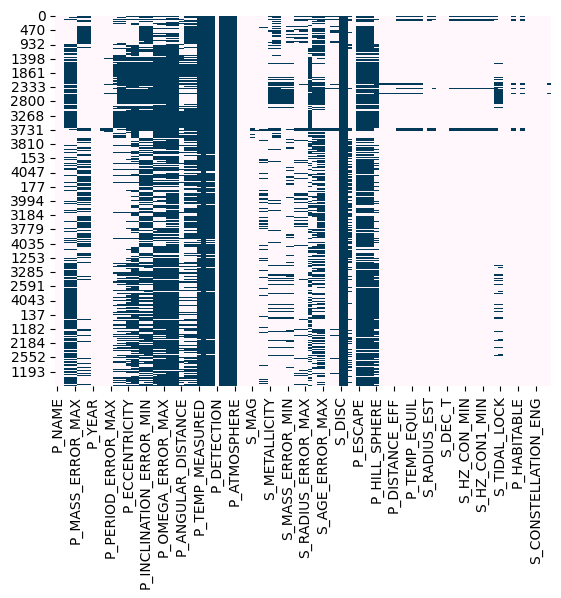

In [123]:
# Missing Data Pattern in Training Data
import seaborn as sns
# isnull: 관측치가 결측(missing value)이면 True, 결측이 아니면 False
sns.heatmap(oversampled.isnull(), cbar=False, cmap='PuBu') # , colorbar의 유무, 히트맵의 색

In [124]:
total = oversampled.isnull().sum().sort_values(ascending=False) # null값 개수 합 내림차순으로 정렬
percent = (oversampled.isnull().sum()/oversampled.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head(50)

,Total,Percent
P_ALT_NAMES,11979,1.000000
P_GEO_ALBEDO,11979,1.000000
S_DISC,11979,1.000000
P_ATMOSPHERE,11979,1.000000
S_MAGNETIC_FIELD,11979,1.000000
P_DETECTION_MASS,11979,1.000000
P_DETECTION_RADIUS,11979,1.000000
P_GEO_ALBEDO_ERROR_MAX,11469,0.957425
P_GEO_ALBEDO_ERROR_MIN,11469,0.957425
P_TEMP_MEASURED,11469,0.957425


In [125]:
# 'P_GEO_ALBEDO'부터 'P_MASS'까지 모든 특성에 누락된 값이 50% 이상 있음을 알 수 있다.
# 따라서 편견을 피하기 위해 결측치가 50%이상인 경우 해당 기능을 폐기하겠습니다.

In [126]:
compact_data = oversampled.drop(['P_GEO_ALBEDO', 'P_DETECTION_MASS', 'P_DETECTION_RADIUS', 'P_ALT_NAMES', 'P_ATMOSPHERE', 'S_DISC', 'S_MAGNETIC_FIELD',
                 'P_TEMP_MEASURED', 'P_GEO_ALBEDO_ERROR_MIN', 'P_GEO_ALBEDO_ERROR_MAX', 'P_TPERI_ERROR_MAX', 'P_TPERI_ERROR_MIN', 'P_TPERI',
                 'P_DENSITY', 'P_ESCAPE', 'P_GRAVITY', 'P_POTENTIAL', 'P_OMEGA_ERROR_MAX', 'P_OMEGA_ERROR_MIN', 'P_OMEGA', 'P_INCLINATION_ERROR_MAX',
                 'P_INCLINATION_ERROR_MIN', 'P_INCLINATION', 'P_ECCENTRICITY_ERROR_MAX', 'P_ECCENTRICITY_ERROR_MIN', 'S_AGE_ERROR_MIN', 'S_AGE_ERROR_MAX',
                 'P_IMPACT_PARAMETER_ERROR_MIN', 'P_IMPACT_PARAMETER_ERROR_MAX', 'P_IMPACT_PARAMETER', 'P_MASS_ERROR_MAX', 'P_MASS_ERROR_MIN', 'P_HILL_SPHERE',
                 'P_MASS'], axis = 1)

In [127]:
compact_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11979 entries, 0 to 2205
Data columns (total 78 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   P_NAME                       11979 non-null  object 
 1   P_STATUS                     11979 non-null  float64
 2   P_RADIUS                     8239 non-null   float64
 3   P_RADIUS_ERROR_MIN           8205 non-null   float64
 4   P_RADIUS_ERROR_MAX           8205 non-null   float64
 5   P_YEAR                       11979 non-null  int64  
 6   P_UPDATED                    11979 non-null  object 
 7   P_PERIOD                     11869 non-null  float64
 8   P_PERIOD_ERROR_MIN           11738 non-null  float64
 9   P_PERIOD_ERROR_MAX           11738 non-null  float64
 10  P_SEMI_MAJOR_AXIS            8981 non-null   float64
 11  P_SEMI_MAJOR_AXIS_ERROR_MIN  7716 non-null   float64
 12  P_SEMI_MAJOR_AXIS_ERROR_MAX  7717 non-null   float64
 13  P_ECCENTRICITY   

In [128]:
# 컴팩트 데이터 세트에는 77개의 기능이 있습니다.
# 이제 결측값이 있는 범주형 열을 식별하고 먼저 모드로 대치하겠습니다.

In [129]:
compact_data.select_dtypes(include=['object']).columns

Index(['P_NAME', 'P_UPDATED', 'P_DETECTION', 'S_NAME', 'S_TYPE', 'S_ALT_NAMES',
       'P_TYPE', 'S_TYPE_TEMP', 'S_RA_T', 'S_DEC_T', 'P_TYPE_TEMP',
       'S_CONSTELLATION', 'S_CONSTELLATION_ABR', 'S_CONSTELLATION_ENG'],
      dtype='object')

In [130]:
compact_data_obj = compact_data.select_dtypes(include=['object'])

In [131]:
total = compact_data_obj.isnull().sum().sort_values(ascending=False)
percent = (compact_data_obj.isnull().sum()/compact_data_obj.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head()

,Total,Percent
S_TYPE,5853,0.488605
P_TYPE_TEMP,327,0.027298
S_TYPE_TEMP,136,0.011353
P_TYPE,17,0.001419
P_NAME,0,0.000000


In [132]:
# fillna: DataFrame에서 결측값을 원하는 값으로 변경하는 메서드
# mode(): 각 열에 대해서 최빈값이 인덱스 0에 출력된다.만약 최빈값이 여러개일 경우 갯수만큼 인덱스가 생성되어 출력된다.
compact_data['S_TYPE'] = compact_data['S_TYPE'].fillna(compact_data['S_TYPE'].mode()[0])
compact_data['P_TYPE_TEMP'] = compact_data['P_TYPE_TEMP'].fillna(compact_data['P_TYPE_TEMP'].mode()[0])
compact_data['S_TYPE_TEMP'] = compact_data['S_TYPE_TEMP'].fillna(compact_data['S_TYPE_TEMP'].mode()[0])
compact_data['P_TYPE'] = compact_data['P_TYPE'].fillna(compact_data['P_TYPE'].mode()[0])
compact_data.head()

,P_NAME,P_STATUS,P_RADIUS,P_RADIUS_ERROR_MIN,P_RADIUS_ERROR_MAX,P_YEAR,P_UPDATED,P_PERIOD,P_PERIOD_ERROR_MIN,P_PERIOD_ERROR_MAX,...,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
0,11 Com b,3.0,NaN,NaN,NaN,2007,2014-05-14,326.03000,-0.32,0.32,...,0,Hot,0,0.083813,Coma Berenices,Com,Berenice's Hair,12.082709,6165.86330,1.29
1,11 UMi b,3.0,NaN,NaN,NaN,2009,2018-09-06,516.21997,-3.20,3.20,...,0,Hot,0,0.082414,Ursa Minor,UMi,Little Bear,12.229641,4684.78480,1.53
2,14 And b,3.0,NaN,NaN,NaN,2008,2014-05-14,185.84000,-0.23,0.23,...,0,Hot,0,0.081917,Andromeda,And,Andromeda,12.848516,1525.57440,0.83
3,14 Her b,3.0,NaN,NaN,NaN,2002,2018-09-06,1773.40000,-2.50,2.50,...,0,Cold,0,0.145241,Hercules,Her,Hercules,12.865261,1481.07850,2.93
4,16 Cyg B b,3.0,NaN,NaN,NaN,1996,2018-09-06,798.50000,-1.00,1.00,...,1,Warm,0,0.368627,Cygnus,Cyg,Swan,13.421749,565.73385,1.66


In [133]:
# 이제 레이블 인코딩(문자열 값을 숫자형 카테고리 값으로 변경)을 사용하여 범주형 열을 숫자형 열로 변환하겠습니다.

In [134]:
# 머신러닝을 위한 대표적인 인코딩 방식은 레이블 인코딩(Label Encoding)과 원-핫 인코딩이 있습니다.
# 사이킷런의 알고리즘은 문자열 값을 입력 값으로 허용하지 않습니다. 그래서 모든 문자열 값은 인코딩 돼서 숫자 형으로 변환해야 합니다.
# 레이블 인코딩은 간단하게 문자열 값을 숫자형 카테고리 값으로 변환합니다.
# 하지만 레이블 인코딩이 일괄적으로 숫자 값으로 변환이 되면서 몇몇 ML알고리즘에는 이를 적용할 경우 예측 성능이 떨어지는 경우가 발생할 수 있습니다.
# 숫자로 되어 있어 잘못하면 가중치로 인식하여 값에 왜곡이 생기게 됩니다.
# 이러한 특성 때문에 레이블 인코딩은 선형 회귀와 같은 ML알고리즘에는 적용하지 않습니다.
# 트리 계열의 ML 알고리즘은 숫자의 이러한 특성을 반영하지 않으므로 레이블 인코딩도 별문제가 없습니다.

In [135]:
# Label Encoding을 사용하여 범주형 특성을 연속형 특성으로 변환
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in compact_data.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    compact_data[col] = lencoders[col].fit_transform(compact_data[col])

In [136]:
# 다음으로, MICE 패키지를 사용하여 전체 데이터 세트(앞서 모드를 사용하여 범주형 데이터를 대치했기 때문에 실제로는 숫자 값만)에 대한 결측값을 대치하겠습니다.

In [137]:
# Jupyternotebook(또는 ipython)에서 경고 메시지를 무시하고 싶을 때:
import warnings
warnings.filterwarnings("ignore")

In [138]:
# 연결 방정식에 의한 다중 대치
# https://leehah0908.tistory.com/5
# MICE를 이용한 자동 대치
# - Round robin 방식을 반복하여 결측 값을 회귀하는 방식으로 결측치를 처리합니다.
# - 결측 값을 회귀하는 방식으로 처리하기 때문에 이 방식은 수치형 변수에 자주 사용합니다.
# - 범주형 변수에도 사용이 가능하지만 조금 더 복잡하고 먼저 인코딩됩니다.
from sklearn.experimental import enable_iterative_imputer # iterativeimputer(파라미터)
from sklearn.impute import IterativeImputer # IterativeImputer (회귀대치)
# 얕은 복사는 객체를 새로운 객체로 복사하지만 원본 객체의 주소값을 복사하는 것이고, 깊은 복사는 전체 복사로 참조값의 복사가 아닌 참조된 객체 자체를 복사하는 것을 말한다.
# 코딩을 하다보면 원본 배열의 보존을 할 필요가 허다하기 때문에 이럴때는 배열을 '깊은 복사' 하여야 한다.
MiceImputed = compact_data.copy(deep=True)
mice_imputer = IterativeImputer() # IterativeImputer(random_state=83)
MiceImputed.iloc[:, :] = mice_imputer.fit_transform(compact_data)

In [139]:
MiceImputed.head()

,P_NAME,P_STATUS,P_RADIUS,P_RADIUS_ERROR_MIN,P_RADIUS_ERROR_MAX,P_YEAR,P_UPDATED,P_PERIOD,P_PERIOD_ERROR_MIN,P_PERIOD_ERROR_MAX,...,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
0,0.0,3.0,2.723031,-0.238321,0.310348,2007.0,0.0,326.03000,-0.32,0.32,...,0.0,1.0,0.0,0.083813,24.0,24.0,5.0,12.082709,6165.86330,1.29
1,1.0,3.0,2.723031,-0.238321,0.310348,2009.0,146.0,516.21997,-3.20,3.20,...,0.0,1.0,0.0,0.082414,83.0,83.0,42.0,12.229641,4684.78480,1.53
2,2.0,3.0,2.723031,-0.238321,0.310348,2008.0,0.0,185.84000,-0.23,0.23,...,0.0,1.0,0.0,0.081917,0.0,0.0,2.0,12.848516,1525.57440,0.83
3,3.0,3.0,2.723031,-0.238321,0.310348,2002.0,146.0,1773.40000,-2.50,2.50,...,0.0,0.0,0.0,0.145241,39.0,39.0,34.0,12.865261,1481.07850,2.93
4,4.0,3.0,2.723031,-0.238321,0.310348,1996.0,146.0,798.50000,-1.00,1.00,...,1.0,2.0,0.0,0.368627,30.0,30.0,75.0,13.421749,565.73385,1.66


In [140]:
# isna(): NaN값 포함 여부를 Boolean 타입의 값으로 반환
# isna().sum(): 결측치 개수
MiceImputed.isna().sum(axis = 0)

P_NAME                   0
P_STATUS                 0
P_RADIUS                 0
P_RADIUS_ERROR_MIN       0
P_RADIUS_ERROR_MAX       0
                        ..
S_CONSTELLATION_ABR      0
S_CONSTELLATION_ENG      0
P_RADIUS_EST             0
P_MASS_EST               0
P_SEMI_MAJOR_AXIS_EST    0
Length: 78, dtype: int64

In [141]:
# 다중공선성(통계학의 회귀분석에서 독립변수들 간에 강한 상관관계가 나타나는 문제이다.)제거 :
# 다음으로, 특성 쌍 간에 완벽한 상관 관계가 존재하는지 확인합니다. 다중 공선성을 피하기 위해 하나를 제외하고 해당 쌍에서 하나를 유지합니다.

<Axes: >

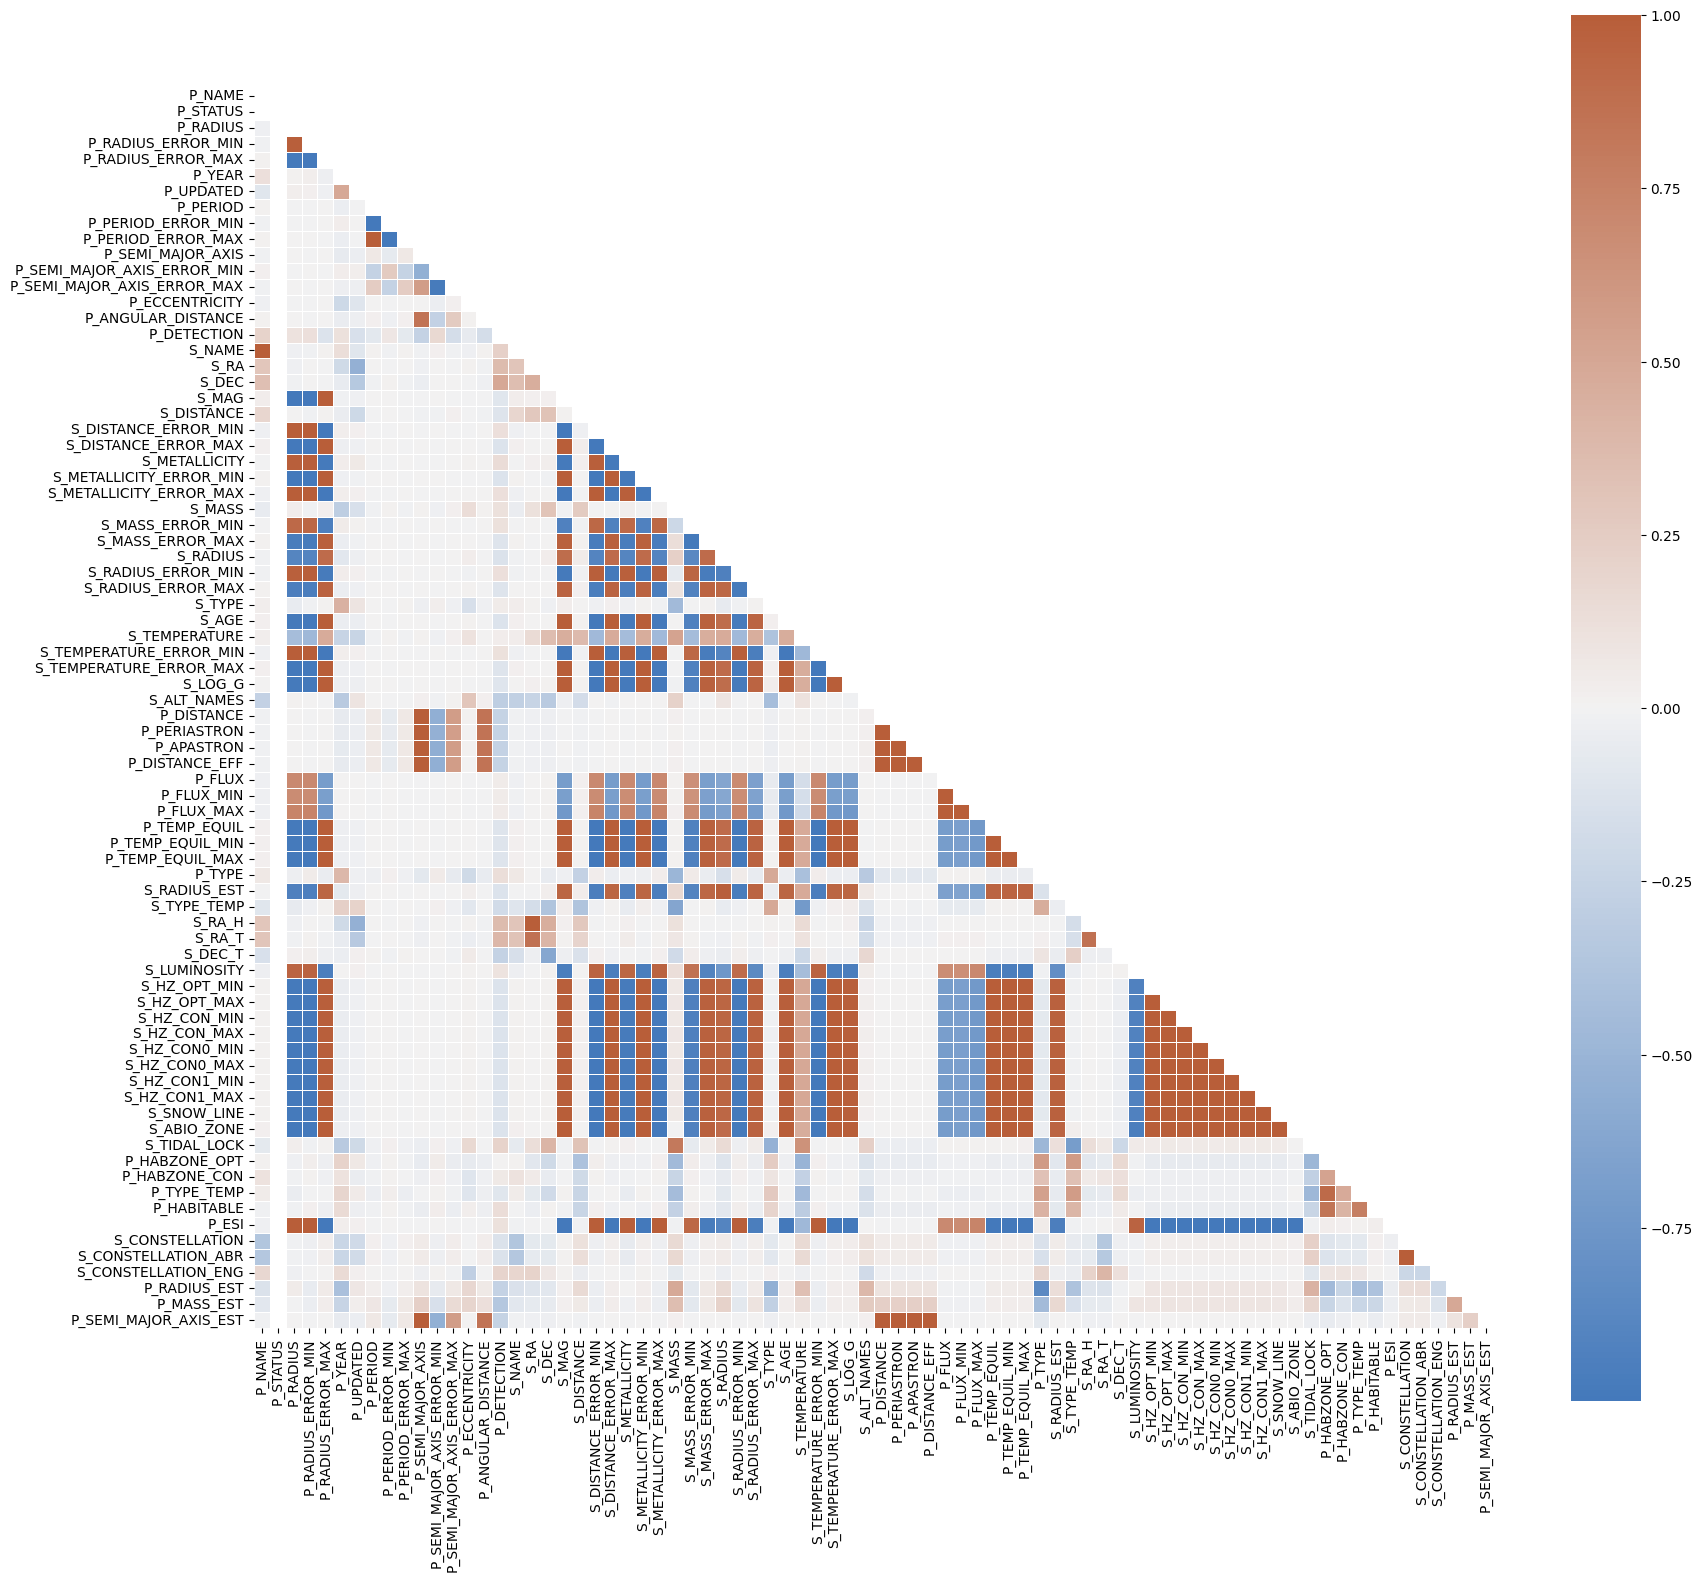

In [142]:
# Correlation Heatmap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
corr = MiceImputed.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(250, 25, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=False, linewidths=.5, cbar_kws={"shrink": 0.9})

In [143]:
# 이미지의 명확성을 유지하기 위해 위의 주석을 피했지만 진한 빨간색 사각형은 교차하는 특징 쌍 간의 완벽한 상관관계를 나타냅니다.
# 우리는 그것들을 폐기할 것입니다.

In [144]:
# 완벽하게 상관된 특성 삭제
working_data = MiceImputed.drop(['S_NAME', 'P_RADIUS', 'P_RADIUS_ERROR_MIN', 'P_RADIUS_ERROR_MAX', 'P_DISTANCE', 'P_PERIASTRON', 'P_APASTRON',
                                 'P_DISTANCE_EFF', 'P_FLUX_MIN', 'P_FLUX_MAX', 'P_TEMP_EQUIL', 'P_TEMP_EQUIL_MIN', 'P_TEMP_EQUIL_MAX',
                                 'S_RADIUS_EST', 'S_RA_H', 'S_RA_T', 'S_LUMINOSITY', 'S_HZ_OPT_MIN', 'S_HZ_OPT_MAX', 'S_HZ_CON_MIN',
                                 'S_HZ_CON_MAX', 'S_HZ_CON0_MIN', 'S_HZ_CON0_MAX', 'S_HZ_CON1_MIN', 'S_HZ_CON1_MAX', 'S_SNOW_LINE',
                                'P_PERIOD_ERROR_MIN', 'P_PERIOD_ERROR_MAX', 'S_MAG', 'S_DISTANCE_ERROR_MIN', 'S_DISTANCE_ERROR_MAX',
                                 'S_METALLICITY', 'S_METALLICITY_ERROR_MIN', 'S_METALLICITY_ERROR_MAX', 'S_AGE', 'S_TEMPERATURE_ERROR_MIN',
                                 'S_TEMPERATURE_ERROR_MAX', 'S_ABIO_ZONE', 'P_ESI', 'S_CONSTELLATION_ABR', 'P_SEMI_MAJOR_AXIS_EST'], axis=1)

In [145]:
working_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11979 entries, 0 to 2205
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   P_NAME                       11979 non-null  float64
 1   P_STATUS                     11979 non-null  float64
 2   P_YEAR                       11979 non-null  float64
 3   P_UPDATED                    11979 non-null  float64
 4   P_PERIOD                     11979 non-null  float64
 5   P_SEMI_MAJOR_AXIS            11979 non-null  float64
 6   P_SEMI_MAJOR_AXIS_ERROR_MIN  11979 non-null  float64
 7   P_SEMI_MAJOR_AXIS_ERROR_MAX  11979 non-null  float64
 8   P_ECCENTRICITY               11979 non-null  float64
 9   P_ANGULAR_DISTANCE           11979 non-null  float64
 10  P_DETECTION                  11979 non-null  float64
 11  S_RA                         11979 non-null  float64
 12  S_DEC                        11979 non-null  float64
 13  S_DISTANCE       

In [146]:
# 현재 작업 데이터 세트에는 36개의 기능만 있습니다.
# 이제 주석 "1"이 나타나는 사각형이 있는지 주석과의 상관 관계를 다시 한 번 교차 확인하겠습니다.

<Axes: >

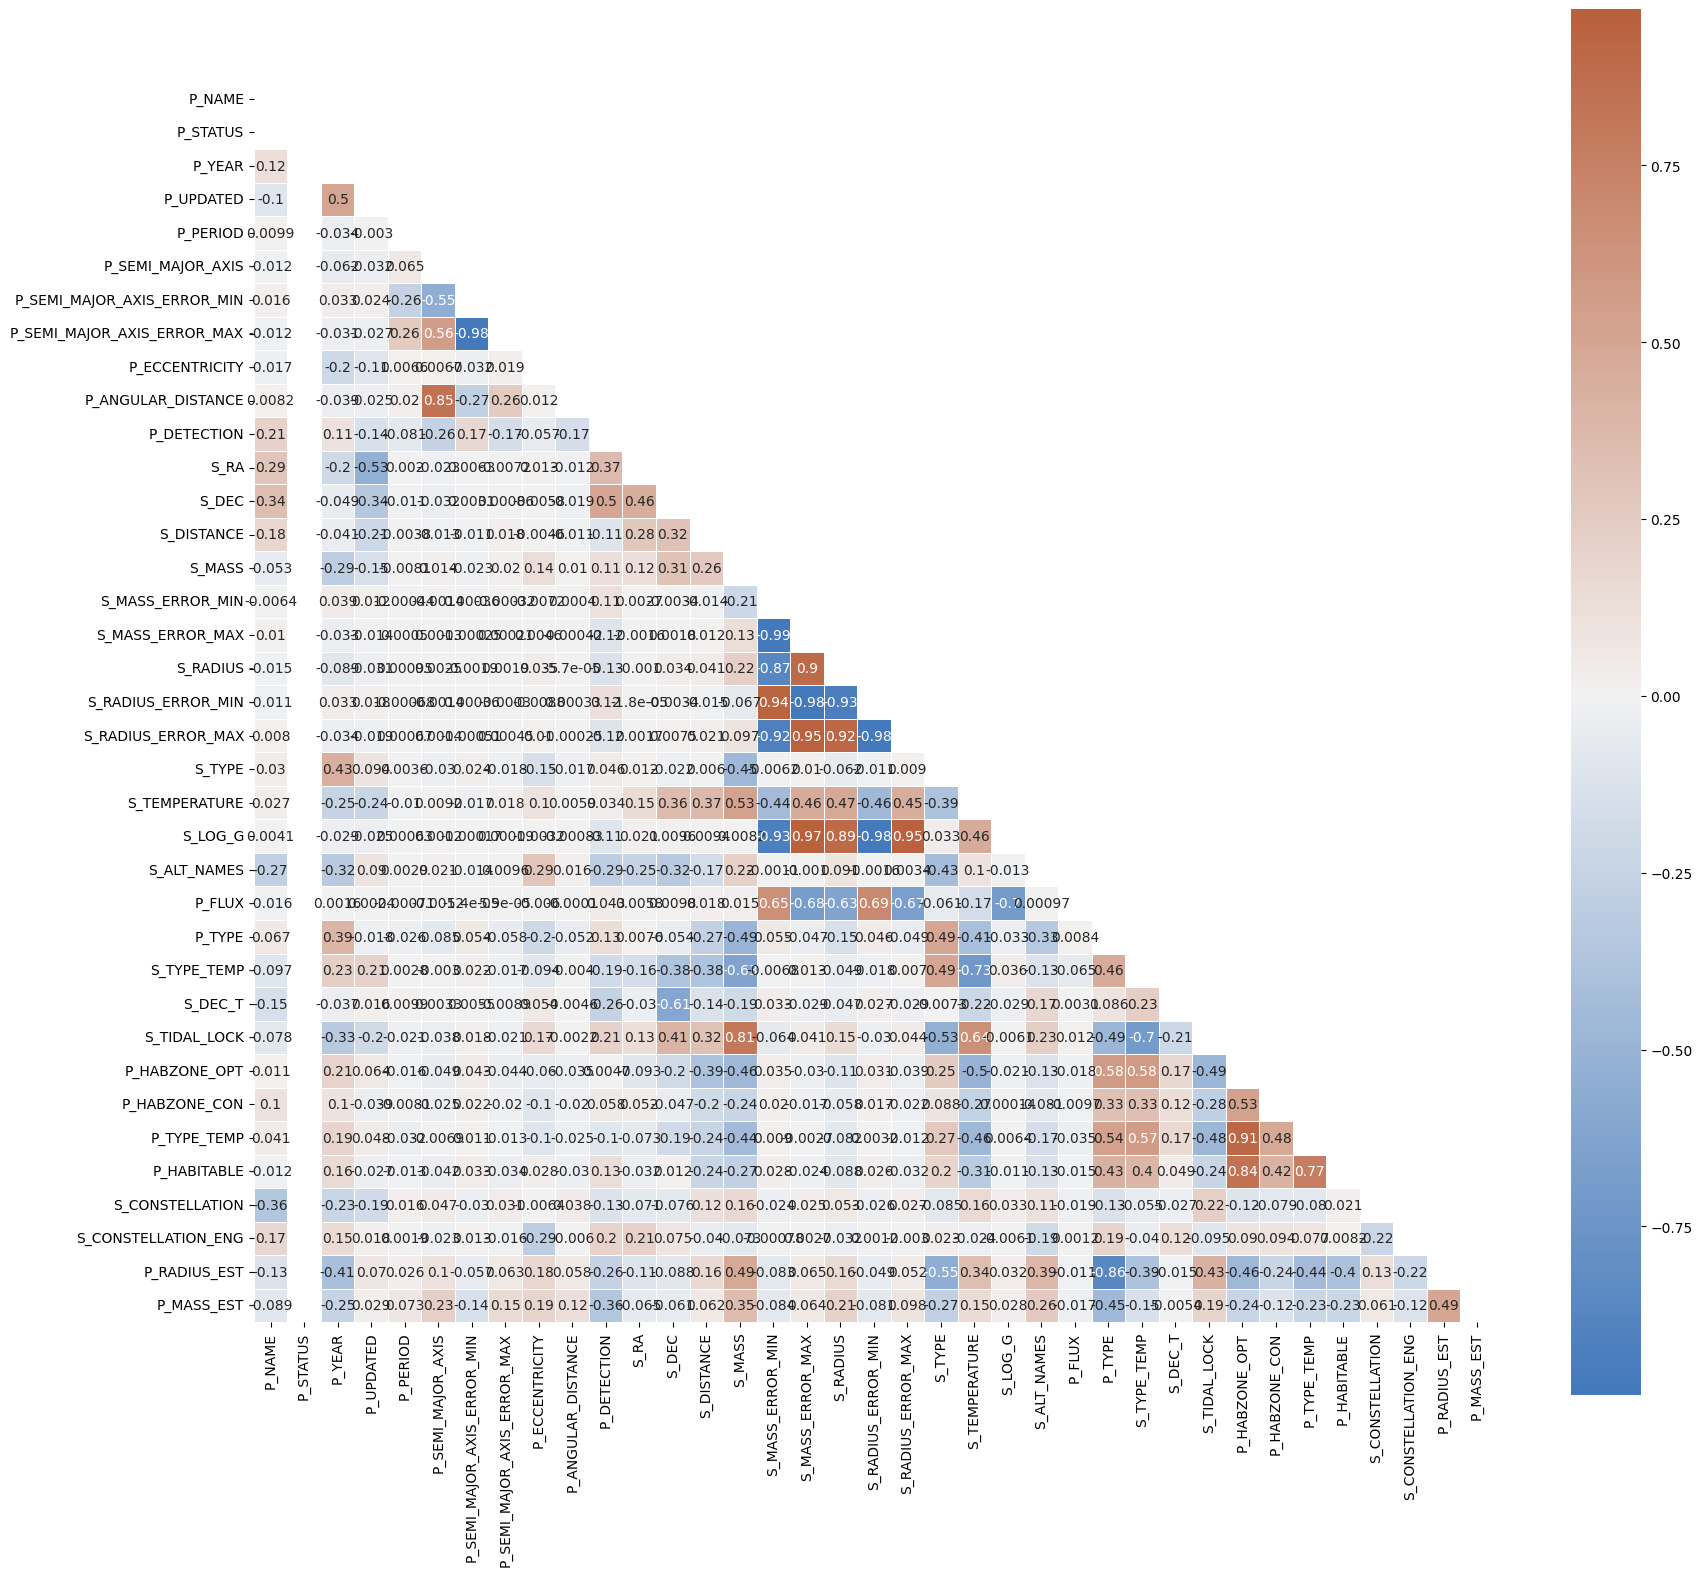

In [147]:
# 축소된 작업 데이터 세트에 대한 상관 히트맵
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
corr = working_data.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(250, 25, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": 0.9})

In [148]:
# 일부 높은 상관관계가 발견되었지만 완벽한 상관관계는 없습니다(예: "1").

In [149]:
# 이상값(이상한 관측값) 제거:
# 다음으로 IQR(Inter Quartile Range)을 사용하여 이상값을 식별하고 이를 제거하겠습니다.

# IQR이란, Interquartile range의 약자로써 Q3 - Q1를 의미한다.
# - Q3 - Q1: 사분위수의 상위 75% 지점의 값과 하위 25% 지점의 값 차이
# - Q1에서 1.5 * IQR을 한 값을 빼준 값을 최소 제한선, Q3에서 1.5 * IQR을 더해준 값을 최대 제한선으로 둔다.
# 그 밑, 또한 그것을 넘어가는 값들을 이상치라고 말할 수 있다.

In [150]:
# IQR을 사용하여 이상값 감지
# qauntile: 주어진 데이터를 동등한 크기로 분할하는 지점을 말합니다.
#           예를 들어, 시험을 치고 상위 10%에 속하는지를 확인하고 싶다면 점수 데이터를 정렬한 뒤 데이터의 수를 10개의 동등한 크기,
#           즉 각 그룹이 같은 데이터 수를 보유하도로 분할하면 됩니다.
Q1 = working_data.quantile(0.25)
Q3 = working_data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

P_NAME                         2150.000000
P_STATUS                          0.000000
P_YEAR                            3.000000
P_UPDATED                        90.000000
P_PERIOD                        101.914721
P_SEMI_MAJOR_AXIS                 0.198560
P_SEMI_MAJOR_AXIS_ERROR_MIN       0.094715
P_SEMI_MAJOR_AXIS_ERROR_MAX       0.101550
P_ECCENTRICITY                    0.045047
P_ANGULAR_DISTANCE               58.917636
P_DETECTION                       1.000000
S_RA                            122.166550
S_DEC                            54.138227
S_DISTANCE                      481.440000
S_MASS                            0.520000
S_MASS_ERROR_MIN                  0.050000
S_MASS_ERROR_MAX                  0.050000
S_RADIUS                          0.540000
S_RADIUS_ERROR_MIN                0.060547
S_RADIUS_ERROR_MAX                0.087495
S_TYPE                            0.000000
S_TEMPERATURE                  1997.530000
S_LOG_G                           0.413547
S_ALT_NAMES

In [151]:
# 데이터 세트에서 이상값 제거
working_data = working_data[~((working_data < (Q1 - 1.5 * IQR)) |(working_data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [153]:
working_data.head()

,P_NAME,P_STATUS,P_YEAR,P_UPDATED,P_PERIOD,P_SEMI_MAJOR_AXIS,P_SEMI_MAJOR_AXIS_ERROR_MIN,P_SEMI_MAJOR_AXIS_ERROR_MAX,P_ECCENTRICITY,P_ANGULAR_DISTANCE,...,S_DEC_T,S_TIDAL_LOCK,P_HABZONE_OPT,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,S_CONSTELLATION,S_CONSTELLATION_ENG,P_RADIUS_EST,P_MASS_EST
176,179.0,3.0,2011.0,0.0,7.200400,0.0505,-0.0053,0.0044,0.130000,7.430,...,2782.0,0.277482,0.0,0.0,1.0,0.0,72.0,63.0,2.25747,5.720904
948,951.0,3.0,2017.0,113.0,9.562742,0.0780,-0.0030,0.0030,0.140000,0.269,...,250.0,0.407663,0.0,0.0,1.0,0.0,11.0,18.0,2.00659,4.683818
984,987.0,3.0,2018.0,127.0,6.922600,0.0616,-0.0019,0.0019,0.107568,0.509,...,7.0,0.399628,0.0,0.0,1.0,0.0,20.0,85.0,1.72634,3.628101
985,988.0,3.0,2018.0,127.0,9.757900,0.0774,-0.0024,0.0024,0.107568,0.640,...,7.0,0.399628,0.0,0.0,1.0,0.0,20.0,85.0,1.63666,3.313943
989,992.0,3.0,2018.0,149.0,3.835476,0.0373,-0.0002,0.0002,0.107568,0.536,...,155.0,0.358688,0.0,0.0,1.0,0.0,65.0,26.0,1.49093,2.828671


# 변수 중요도 분석

In [52]:
# 변수 중요도 분석:
# 데이터 전처리가 완료된 후 외계 행성의 거주 가능성에 기여하는 매우 중요한 기능을 선택합니다.
# Random Forest를 사용한 순열 중요도와 Random Forest 및 Extra Trees 분류기를 사용한 래퍼 방법을 사용하겠습니다.

In [53]:
import warnings
warnings.filterwarnings("ignore")

In [54]:
# Permutation Importance는 기본적으로 제공되는 Feature Importance와 비슷한 기능을 한다.
# 기본적으로 제공되는 feature importance는 보통 가지에서 몇번 등장하는지, 혹은 불순도를 얼마나 낮추는 지에 대한 지표이다.
# 하지만 이 방법의 문제점은 -영향(negative)을 주는 feature를 알수 없다는 것이다.
# 즉, feature selection에서 가장 중요한 불필요한 feature를 빼는 과정에 있어서 크게 도움을 받을 수 없다.
# Permutation Importance는 모델을 학습시킨 뒤, 특정 feature의 데이터를 shuffle 했을 때, 검증 데이터 셋에 대한 예측성능을 확인하고 feature importance를 계산한다.
# 즉, shuffle 했을 때 모델의 성능이 떨어지면, 중요한 feature 인거고 성능이 그대로거나, 좋아지면 중요하지 않은 feature 이다.

In [55]:
# randomforest
# https://bkshin.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-5-%EB%9E%9C%EB%8D%A4-%ED%8F%AC%EB%A0%88%EC%8A%A4%ED%8A%B8Random-Forest%EC%99%80-%EC%95%99%EC%83%81%EB%B8%94Ensemble

In [56]:
!pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107719 sha256=3addcdd035f524da993771a2db702dce4e1d27ea074811c374c6693dc104bcd0
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [57]:
import eli5
# https://hong-yp-ml-records.tistory.com/51
from eli5.sklearn import PermutationImportance
from sklearn.ensemble import RandomForestClassifier as rf

X = working_data.drop('P_HABITABLE', axis=1) # axis=0: 행(인덱스)을 따라 동작/ axis=1: 열(컬럼)을 따라 동작
y = working_data['P_HABITABLE']
perm = PermutationImportance(rf(n_estimators=20, random_state=0).fit(X,y),random_state=1).fit(X,y)
# 모델에서 사용할 트리 개수(학습시 생성할 트리 개수), 난수 seed 설정 -> 모델을 생성하고 위의 학습데이터를 학습(fit)시킨다.
eli5.show_weights(perm, feature_names = X.columns.tolist())
# columns.tolist(): 칼럼을 리스트로 변환

Weight,Feature
0 ± 0.0000,S_TYPE
0 ± 0.0000,P_UPDATED
0 ± 0.0000,P_PERIOD
0 ± 0.0000,P_SEMI_MAJOR_AXIS
0 ± 0.0000,P_SEMI_MAJOR_AXIS_ERROR_MIN
0 ± 0.0000,P_SEMI_MAJOR_AXIS_ERROR_MAX
0 ± 0.0000,P_ECCENTRICITY
0 ± 0.0000,P_ANGULAR_DISTANCE
0 ± 0.0000,P_DETECTION
0 ± 0.0000,S_RA


In [58]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf

#X = working_data.drop('P_HABITABLE', axis=1)
#y = MiceImputed['P_HABITABLE']
selector = SelectFromModel(rf(n_estimators=1000, random_state=0)) #  SelectFromModel에서 RandomForestClassifier를 입력하여 특성의 중요도를 기준으로 변수를 선택
selector.fit(X, y)
support = selector.get_support() # 선택한 특성을 불린 값으로 표시해주어 어떤 특성이 선택되었는지 확인할 수 있음
features = X.loc[:,support].columns.tolist()
print(features)
print(rf(n_estimators=1000, random_state=0).fit(X,y).feature_importances_)

['P_PERIOD', 'S_DEC', 'S_DISTANCE', 'S_MASS', 'S_TEMPERATURE', 'P_FLUX', 'P_TYPE', 'S_TIDAL_LOCK', 'P_HABZONE_OPT', 'P_TYPE_TEMP', 'P_RADIUS_EST', 'P_MASS_EST']
[0.01044707 0.         0.00119292 0.00774545 0.03388669 0.00286724
 0.01328137 0.0104633  0.02556892 0.01468601 0.00070391 0.00990423
 0.03399132 0.0947533  0.05856475 0.00459842 0.00318469 0.00595312
 0.00180363 0.00163513 0.         0.046996   0.01090993 0.
 0.07120151 0.07599288 0.01439462 0.02697967 0.05053458 0.05233967
 0.00358481 0.05349495 0.00114314 0.00143936 0.13318933 0.12256809]


In [59]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier as et

#X = working_data.drop('P_HABITABLE', axis=1)
#y = MiceImputed['P_HABITABLE']
selector = SelectFromModel(et(n_estimators=1000, random_state=123))
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)
print(et(n_estimators=100, random_state=123).fit(X,y).feature_importances_)

['P_PERIOD', 'P_SEMI_MAJOR_AXIS_ERROR_MIN', 'P_ECCENTRICITY', 'S_DEC', 'S_DISTANCE', 'S_MASS', 'S_TEMPERATURE', 'P_FLUX', 'P_TYPE', 'S_TYPE_TEMP', 'S_TIDAL_LOCK', 'P_HABZONE_OPT', 'P_TYPE_TEMP', 'P_RADIUS_EST', 'P_MASS_EST']
[0.02013185 0.         0.00857502 0.00293889 0.02911231 0.01198777
 0.04655375 0.01889205 0.06610505 0.0183736  0.01106415 0.01094137
 0.05731108 0.04843864 0.04161058 0.00289751 0.00997669 0.01283855
 0.00487179 0.011097   0.         0.04303133 0.02718922 0.
 0.03393413 0.1148477  0.03073957 0.01252981 0.02257499 0.08293182
 0.01266021 0.05805059 0.01118454 0.00990623 0.07019305 0.03650918]


In [60]:
# 세 가지 방법 중 하나 이상의 방법으로 반복적으로 나타나는 칼럼을 중요한 칼럼으로 설정할 것

# test/train 분할

In [61]:
features = working_data[['P_TYPE_TEMP','P_PERIOD','S_DEC','S_DISTANCE','S_MASS','S_TEMPERATURE','P_TYPE','S_TIDAL_LOCK','P_HABZONE_OPT','P_RADIUS_EST']]
target = working_data['P_HABITABLE']

# Split into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=12345) # 분할시킬 데이터 입력,
# X_train, X_test, Y_train, Y_test : arrays에 데이터와 레이블을 둘 다 넣었을 경우의 반환이며, 데이터와 레이블의 순서쌍은 유지된다.
# feature 스케일링
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


# 지도학습

In [62]:
#지도 학습을 통한 모델링:
#다중 클래스 분류 문제를 위해 모든 분류기에 대해 one-vs-rest 전략을 사용
#이 전략은 다중 클래스 분류 문제를 여러 이진 분류 문제로 분해한 다음 결과를 비교/결합함.
#분류 목적으로 다음 모델이 사용된다.

#[참조한 코드 대상자가 사용한 방법]
#- Ridge Penalty를 사용한 로지스틱 회귀
#- 올가미 페널티를 사용한 확률적 경사하강법
#- 다항식 나이브 베이즈
#- 힌지 손실이 있는 수동적 공격적 분류기
#- 퍼셉트론
#- 그라디언트 부스팅 분류기

#[내가 생각한 방법]
#- 로지스틱
#- 나이브 베이즈
#- K-NN
#- 결정트리
#- 퍼셉트론

# 로지스틱 회귀 분석

In [63]:
# 1. 로지스틱 회귀 분석
from sklearn.linear_model import LogisticRegression

l_model = LogisticRegression()
l_model.fit(X_train, y_train)

LogisticRegression()

In [64]:
l_model.score(X_train, y_train)

1.0

In [65]:
l_model.score(X_test, y_test)

0.9972789115646259

In [66]:
l_model.coef_

array([[-3.53016864, -0.79975072, -0.34620543,  0.32932014,  0.23424963,
         0.42577178,  0.2338776 ,  0.14646477, -3.53016864,  0.23238509],
       [ 1.48823854,  1.08293829, -2.88698443, -1.42346506, -0.9510733 ,
        -1.22565532,  4.18759846, -1.29047019,  1.48823854, -4.43986172],
       [ 2.0419301 , -0.28318757,  3.23318986,  1.09414492,  0.71682367,
         0.79988354, -4.42147606,  1.14400542,  2.0419301 ,  4.20747663]])

# 나이브 베이즈(gaussian)


In [67]:
from sklearn.naive_bayes import GaussianNB
#Create a Gaussian Classifier
n_model = GaussianNB()

# Train the model using the training sets
n_model.fit(X_train,y_train)

#Predict Output
predicted= n_model.predict(X_test) # # 예측된 클래스 목록을 반환함 - 모든 데이터 포인트에 대해 하나의 예측
probabilities = n_model.predict_proba(X_test) # 모든 데이터 포인트에 대해 각 클래스의 확률 목록을 반환합니다.
print("Predicted Value:", predicted)
print("Predicted percent:", probabilities)

Predicted Value: [0. 2. 1. 1. 1. 1. 1. 0. 1. 2. 1. 1. 0. 2. 1. 1. 1. 1. 1. 1. 0. 1. 2. 2.
 1. 1. 1. 1. 1. 2. 1. 0. 2. 2. 2. 2. 2. 1. 1. 2. 2. 1. 2. 1. 2. 1. 1. 1.
 0. 2. 1. 1. 2. 1. 2. 1. 2. 2. 2. 1. 1. 1. 1. 1. 1. 2. 2. 1. 1. 2. 2. 2.
 1. 1. 1. 2. 1. 0. 2. 1. 1. 1. 1. 1. 2. 1. 1. 2. 2. 2. 0. 1. 2. 1. 2. 2.
 0. 2. 0. 2. 2. 2. 1. 2. 1. 1. 1. 2. 2. 1. 1. 1. 1. 0. 0. 1. 1. 2. 2. 1.
 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 2. 1. 1. 0. 2. 1. 1. 0. 2. 2. 1. 2. 2.
 2. 2. 1. 2. 0. 1. 1. 1. 2. 2. 2. 1. 1. 2. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 0. 0. 2. 1. 1. 2. 1. 1. 2. 1. 2. 2. 2. 2. 2. 1. 2. 1.
 1. 1. 1. 1. 1. 1. 2. 0. 1. 1. 2. 2. 2. 2. 2. 0. 1. 1. 2. 0. 1. 0. 1. 1.
 2. 0. 1. 2. 2. 1. 2. 1. 2. 2. 1. 1. 1. 1. 2. 2. 2. 2. 2. 1. 1. 2. 1. 2.
 1. 1. 1. 2. 2. 2. 1. 1. 2. 1. 2. 1. 1. 2. 1. 1. 1. 1. 1. 2. 2. 1. 1. 0.
 1. 2. 2. 1. 2. 2. 1. 0. 2. 1. 0. 1. 1. 1. 2. 1. 2. 1. 0. 1. 2. 2. 2. 0.
 2. 1. 1. 1. 1. 1. 2. 2. 2. 2. 1. 1. 1. 1. 1. 2. 2. 2. 0. 1. 1. 2. 1. 1.
 1. 0. 2. 1. 2. 2. 1. 2. 2. 2. 2. 

In [68]:
n_model.score(X_train, y_train)

1.0

In [69]:
n_model.score(X_test, y_test)

1.0

In [70]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
accuracy = accuracy_score(y_test, predicted)
recall = recall_score(y_test, predicted,average="macro")
precision = precision_score(y_test, predicted,average="macro")
f1 = f1_score(y_test, predicted,average="macro")
print('정확도:{0}, 재현율:{1}, 정밀도{2}, f1 score{3}'.format(accuracy, recall, precision, f1))

정확도:1.0, 재현율:1.0, 정밀도1.0, f1 score1.0


# K-NN

In [71]:
from sklearn.neighbors import KNeighborsClassifier
k_model = KNeighborsClassifier()

k_model.fit(X_train,y_train)

predicted= k_model.predict(X_test)
probabilities = k_model.predict_proba(X_test)
print("Predicted Value:", predicted)
print("Predicted percent:", probabilities)

Predicted Value: [0. 2. 1. 1. 1. 1. 1. 0. 1. 2. 1. 1. 0. 2. 1. 1. 1. 1. 1. 1. 0. 1. 2. 2.
 1. 1. 1. 1. 1. 2. 1. 0. 2. 2. 2. 2. 2. 1. 1. 2. 2. 1. 2. 1. 2. 1. 1. 1.
 0. 2. 1. 1. 2. 1. 2. 1. 2. 2. 2. 1. 1. 1. 1. 1. 1. 2. 2. 1. 1. 2. 2. 2.
 1. 1. 1. 2. 1. 0. 2. 1. 1. 1. 1. 1. 2. 1. 1. 2. 2. 2. 0. 1. 2. 1. 2. 2.
 0. 2. 0. 2. 2. 2. 1. 2. 1. 1. 1. 2. 2. 1. 1. 1. 1. 0. 0. 1. 1. 2. 2. 1.
 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 2. 1. 1. 0. 2. 1. 1. 0. 2. 2. 1. 2. 2.
 2. 2. 1. 2. 0. 1. 1. 1. 2. 2. 2. 1. 1. 2. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 0. 0. 2. 1. 1. 2. 1. 1. 2. 1. 2. 2. 2. 2. 2. 1. 2. 1.
 1. 1. 1. 1. 1. 1. 2. 0. 1. 1. 2. 2. 2. 2. 2. 0. 1. 1. 2. 0. 1. 0. 1. 1.
 2. 0. 1. 2. 2. 1. 2. 1. 2. 2. 1. 1. 1. 1. 2. 2. 2. 2. 2. 1. 1. 2. 1. 2.
 1. 1. 1. 2. 2. 2. 1. 1. 2. 1. 2. 1. 1. 2. 1. 1. 1. 1. 1. 2. 2. 1. 1. 0.
 1. 2. 2. 1. 2. 2. 1. 0. 2. 1. 0. 1. 1. 1. 2. 1. 2. 1. 0. 1. 2. 2. 2. 0.
 2. 1. 1. 1. 1. 1. 2. 2. 2. 2. 1. 1. 1. 1. 1. 2. 2. 2. 0. 1. 1. 2. 1. 1.
 1. 0. 2. 1. 2. 2. 1. 2. 2. 2. 2. 

In [72]:
n_model.score(X_train, y_train)

1.0

In [73]:
n_model.score(X_test, y_test)

1.0

In [74]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
accuracy = accuracy_score(y_test, predicted)
recall = recall_score(y_test, predicted,average="macro")
precision = precision_score(y_test, predicted,average="macro")
f1 = f1_score(y_test, predicted,average="macro")
print('정확도:{0}, 재현율:{1}, 정밀도{2}, f1 score{3}'.format(accuracy, recall, precision, f1))

정확도:1.0, 재현율:1.0, 정밀도1.0, f1 score1.0


# **2. 외계행성 찾기**

In [93]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [94]:
train_df = pd.read_csv('exoTrain.csv')

In [95]:
train_df.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,-66.47,-15.50,-44.59,-49.03,-70.16,-85.53,-52.06,-73.41,-59.69,...,-6.19,10.00,10.00,50.12,-14.97,-32.75,-30.28,-9.28,-31.53,26.88
1,2,560.19,262.94,189.94,185.12,210.38,104.19,289.56,172.06,81.75,...,106.00,-7.94,-7.94,-7.94,52.31,-165.00,7.38,-61.56,-44.75,104.50
2,2,-1831.31,-1781.44,-1930.84,-2016.72,-1963.31,-1956.12,-2128.24,-2188.20,-2212.82,...,903.82,75.61,75.61,191.77,196.16,326.61,481.28,635.63,651.68,695.74
3,2,2053.62,2126.05,2146.33,2159.84,2237.59,2236.12,2244.47,2279.61,2288.22,...,1832.59,1935.53,1965.84,2094.19,2212.52,2292.64,2454.48,2568.16,2625.45,2578.80
4,2,-48.48,-22.95,11.15,-70.04,-120.34,-150.04,-309.38,-160.73,-201.41,...,90.70,-20.01,-62.12,-45.96,-52.40,-4.93,26.74,21.43,145.30,197.20


In [96]:
train_df.isnull().sum().sum()

0

In [97]:
train_df.shape

(4139, 3198)

In [98]:
train_df.describe()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
count,4139.000000,4.139000e+03,4.139000e+03,4.139000e+03,4.139000e+03,4.139000e+03,4.139000e+03,4.139000e+03,4.139000e+03,4.139000e+03,...,4.139000e+03,4.139000e+03,4.139000e+03,4.139000e+03,4.139000e+03,4.139000e+03,4139.000000,4139.000000,4139.000000,4139.000000
mean,1.004590,1.816446e+02,1.568447e+02,1.590237e+02,1.641128e+02,1.600185e+02,1.422938e+02,1.224969e+02,1.398540e+02,1.587576e+02,...,3.718268e+02,5.183699e+02,6.848423e+02,7.250097e+02,6.498404e+02,5.758644e+02,-639.247567,-659.899331,-535.553361,-391.358115
std,0.067606,2.356241e+04,2.393386e+04,2.406857e+04,2.439932e+04,2.530838e+04,2.643585e+04,2.648431e+04,2.504892e+04,2.279437e+04,...,3.139468e+04,3.907660e+04,4.793069e+04,5.482201e+04,5.594231e+04,5.865617e+04,19410.041542,19203.253541,17602.893758,15643.499358
min,1.000000,-2.278563e+05,-3.154408e+05,-2.840018e+05,-2.340069e+05,-4.231956e+05,-5.975521e+05,-6.724046e+05,-5.790136e+05,-3.973882e+05,...,-3.240480e+05,-3.045540e+05,-2.933140e+05,-2.838420e+05,-3.288214e+05,-5.028894e+05,-775322.000000,-732006.000000,-700992.000000,-643170.000000
25%,1.000000,-4.625000e+01,-4.439500e+01,-4.244500e+01,-3.869500e+01,-3.522500e+01,-3.683500e+01,-3.239000e+01,-3.128500e+01,-3.094500e+01,...,-1.882500e+01,-1.993000e+01,-1.786500e+01,-2.135000e+01,-2.221000e+01,-2.424000e+01,-26.590000,-23.075000,-20.090000,-17.990000
50%,1.000000,-2.500000e+00,-2.430000e+00,-2.580000e+00,-2.040000e+00,-1.960000e+00,-2.300000e+00,-2.100000e+00,-2.100000e+00,-2.110000e+00,...,2.590000e+00,2.700000e+00,3.090000e+00,3.370000e+00,3.130000e+00,3.410000e+00,-0.530000,0.540000,1.320000,2.060000
75%,1.000000,4.137000e+01,3.876500e+01,3.633500e+01,3.532000e+01,3.489000e+01,3.078000e+01,3.055500e+01,2.727000e+01,2.631500e+01,...,2.204000e+01,2.284000e+01,2.581000e+01,2.749500e+01,2.778500e+01,3.056500e+01,19.240000,19.365000,20.415000,21.705000
max,2.000000,1.439240e+06,1.453319e+06,1.468429e+06,1.495750e+06,1.510937e+06,1.508152e+06,1.465743e+06,1.416827e+06,1.342888e+06,...,1.779338e+06,2.379227e+06,2.992070e+06,3.434973e+06,3.481220e+06,3.616292e+06,288607.500000,215972.000000,193191.000000,185221.500000


In [99]:
X = train_df.drop('LABEL', axis=1)
y = train_df['LABEL']

In [100]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)

In [101]:
clf.fit(X, y)

RandomForestClassifier(max_depth=2, random_state=0)

In [102]:
scores = cross_val_score(clf, X, y, cv=5)

In [85]:
print("Accuracy: %0.2f%%" % (scores.mean()*100))

Accuracy: 99.27%


In [86]:
# test

In [103]:
test_df = pd.read_csv('exoTest.csv')

In [104]:
test_df.isnull().sum().sum()

0

In [105]:
test_df.shape

(948, 3198)

In [106]:
test_df.describe()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
count,948.000000,948.000000,948.000000,948.00000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,...,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000
mean,1.018987,-17.645306,5.163755,95.22731,121.390770,139.247479,167.357416,92.131350,3.794399,-33.849293,...,246.964557,396.441371,611.214146,842.361160,885.391962,1002.135348,135.943629,-41.168449,-24.093819,95.994283
std,0.136552,7625.775618,6973.769190,6899.78811,7318.848331,7949.639919,8190.527069,8065.789599,8741.485699,10203.406506,...,10044.547453,10159.803214,11132.987875,13934.364623,14954.292357,16753.247833,7963.498996,8669.267070,8251.806508,7308.201404
min,1.000000,-124125.000000,-98459.000000,-100842.00000,-101829.000000,-108234.000000,-122856.000000,-138090.000000,-152423.000000,-165301.000000,...,-119736.370000,-72540.000000,-24188.000000,-5009.000000,-8524.000000,-9719.000000,-92840.870000,-149342.000000,-117902.870000,-50809.000000
25%,1.000000,-23.420000,-21.277500,-19.25000,-19.175000,-18.765000,-15.717500,-15.270000,-12.950000,-9.065000,...,-13.612500,-15.812500,-15.622500,-17.625000,-22.407500,-24.520000,-27.422500,-28.007500,-28.377500,-36.217500
50%,1.000000,6.015000,6.460000,6.20500,6.080000,3.790000,4.080000,3.835000,3.835000,4.640000,...,2.685000,2.635000,2.795000,4.990000,3.315000,3.990000,-1.335000,-0.020000,-0.425000,-0.725000
75%,1.000000,84.117500,80.095000,78.17000,70.957500,64.402500,58.015000,54.070000,52.035000,55.290000,...,22.710000,21.110000,29.320000,35.815000,27.827500,33.805000,13.502500,14.315000,14.940000,14.732500
max,2.000000,143108.160000,142964.970000,142830.60000,142708.130000,142510.810000,142282.750000,142124.130000,141921.100000,141676.910000,...,189882.000000,223055.000000,274641.000000,364922.000000,394670.000000,449520.000000,201974.000000,204761.000000,207590.000000,211302.000000


In [107]:
X_test = test_df.drop('LABEL', axis=1)
y_test = test_df['LABEL']

In [108]:
y_pred_test = clf.predict(X)

In [109]:
accuracy = accuracy_score(y, y_pred_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.57%


# **3. 외계행성 거주 가능성 출력하기**

In [159]:
pd.set_option('display.max_columns', None)
working_data.head()

,P_NAME,P_STATUS,P_YEAR,P_UPDATED,P_PERIOD,P_SEMI_MAJOR_AXIS,P_SEMI_MAJOR_AXIS_ERROR_MIN,P_SEMI_MAJOR_AXIS_ERROR_MAX,P_ECCENTRICITY,P_ANGULAR_DISTANCE,P_DETECTION,S_RA,S_DEC,S_DISTANCE,S_MASS,S_MASS_ERROR_MIN,S_MASS_ERROR_MAX,S_RADIUS,S_RADIUS_ERROR_MIN,S_RADIUS_ERROR_MAX,S_TYPE,S_TEMPERATURE,S_LOG_G,S_ALT_NAMES,P_FLUX,P_TYPE,S_TYPE_TEMP,S_DEC_T,S_TIDAL_LOCK,P_HABZONE_OPT,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,S_CONSTELLATION,S_CONSTELLATION_ENG,P_RADIUS_EST,P_MASS_EST
176,179.0,3.0,2011.0,0.0,7.200400,0.0505,-0.0053,0.0044,0.130000,7.430,7.0,259.745090,-34.996827,6.80,0.33,-0.02,0.02,0.818033,-0.080547,0.107495,175.0,3350.0,4.690000,0.0,8.224320,4.0,5.0,2782.0,0.277482,0.0,0.0,1.0,0.0,72.0,63.0,2.25747,5.720904
948,951.0,3.0,2017.0,113.0,9.562742,0.0780,-0.0030,0.0030,0.140000,0.269,8.0,132.142990,17.190685,289.54,0.69,-0.07,0.07,0.670000,-0.030000,0.040000,175.0,4349.9,4.256453,0.0,23.903665,4.0,4.0,250.0,0.407663,0.0,0.0,1.0,0.0,11.0,18.0,2.00659,4.683818
984,987.0,3.0,2018.0,127.0,6.922600,0.0616,-0.0019,0.0019,0.107568,0.509,8.0,14.517821,-0.193155,121.00,0.65,-0.06,0.06,0.630000,-0.060000,0.060000,175.0,4079.0,4.650000,0.0,25.943176,4.0,4.0,7.0,0.399628,0.0,0.0,1.0,0.0,20.0,85.0,1.72634,3.628101
985,988.0,3.0,2018.0,127.0,9.757900,0.0774,-0.0024,0.0024,0.107568,0.640,8.0,14.517821,-0.193155,121.00,0.65,-0.06,0.06,0.630000,-0.060000,0.060000,175.0,4079.0,4.650000,0.0,16.432462,4.0,4.0,7.0,0.399628,0.0,0.0,1.0,0.0,20.0,85.0,1.63666,3.313943
989,992.0,3.0,2018.0,149.0,3.835476,0.0373,-0.0002,0.0002,0.107568,0.536,8.0,19.304525,9.501381,69.61,0.47,-0.01,0.01,0.450000,-0.010000,0.010000,175.0,3695.0,4.800000,0.0,24.308255,5.0,5.0,155.0,0.358688,0.0,0.0,1.0,0.0,65.0,26.0,1.49093,2.828671


In [181]:
x = [list(input("'P_TYPE_TEMP','P_PERIOD','S_DEC','S_DISTANCE','S_MASS','S_TEMPERATURE','P_TYPE','S_TIDAL_LOCK','P_HABZONE_OPT','P_RADIUS_EST' 의 값을 입력하세요: ").split(','))]
#from sklearn.preprocessing import LabelEncoder
#lencoders1 = {}
type(x)

'P_TYPE_TEMP','P_PERIOD','S_DEC','S_DISTANCE','S_MASS','S_TEMPERATURE','P_TYPE','S_TIDAL_LOCK','P_HABZONE_OPT','P_RADIUS_EST' 의 값을 입력하세요: 1.0,7.200400,-34.996827,6.80,0.33,3350.0,4.0,0.277482,0.0,2.25747


list

In [182]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x= scaler.fit_transform(x)

predicted_x= k_model.predict(x)
probabilities_x = k_model.predict_proba(x)
print("Predicted Value:", predicted_x)
print("Predicted percent:", probabilities_x)

Predicted Value: [0.]
Predicted percent: [[1. 0. 0.]]
